<a href="https://colab.research.google.com/github/RohitYadav24/hotel_booking_analysis/blob/main/CAPSTONE_1_Hotel_Booking_Analysis_Rohit_Yadav_Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>



1. Which year has the most bookings.
2. From which country the most guests are coming.
3. Which meal type is most preffered meal of customers.
4. What is the percentage of bookings in each hotel
5. What is the percentage of repeated guests
6. Which hotel has higher lead time.
7. Which is the most common channel for booking hotels.
8. What is the percentage distribution of required_car_parking_spaces.
9. what is the percentage of cancellation.
10. Which significant distribution channel has highest cancellation percentage.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path ='/content/drive/MyDrive/AlmaBetter/hotel_booking.csv'
hotel_df=pd.read_csv(file_path)

In [ ]:
hotel_df.shape

(119390, 36)

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 36 columns in the dataframe and some columns like  'children', 'company', 'country' and 'agent' have null values.

In [ ]:
df = hotel_df.copy()

First of all we will try to understand the meaning of all columns of the dataframe.\For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

**Cleaning data**

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

In [ ]:
df[df.duplicated()].shape

(0, 36)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(119390, 36)

In [ ]:
df.isnull().sum().sort_values(ascending = False)[:6]

company            112593
agent               16340
country               488
children                4
hotel                   0
booking_changes         0
dtype: int64

We have null values in Company, Agent, Children and Country.

1. Droping the company column because more than 80% data is missing
2. for country I will fill Missing values with object 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)


In [ ]:
hotel_df.drop('company', axis=1, inplace=True)
null_columns = ['agent', 'children']
for col in null_columns:
  hotel_df[col].fillna(0, inplace=True)
  

hotel_df['country'].fillna('others', inplace=True)

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
len(hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children']==0])
hotel_df.drop(hotel_df[hotel_df['adults']+hotel_df['babies']+hotel_df['children'] == 0].index, inplace=True)

In [ ]:
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']
hotel_df['total_stay'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']

# **EDA**

Exploratory Data Analysis

**Univariate Analysis**

1. Which year has the most bookings.

Text(0, 0.5, 'Booking')

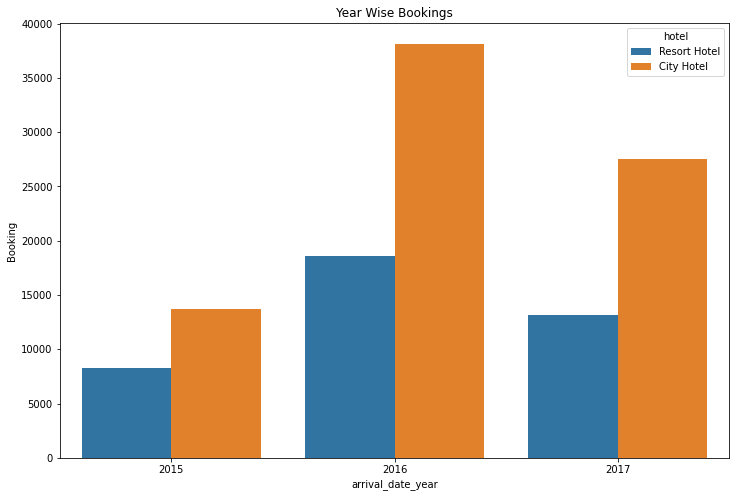

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['arrival_date_year'], hue=df['hotel'])
plt.title('Year Wise Bookings')
plt.ylabel('Booking')

**Observation**

2016 Year has the most bookings


2. From which country the most guests are coming?

Text(0.5, 1.0, 'Numbers of guest from different Country')

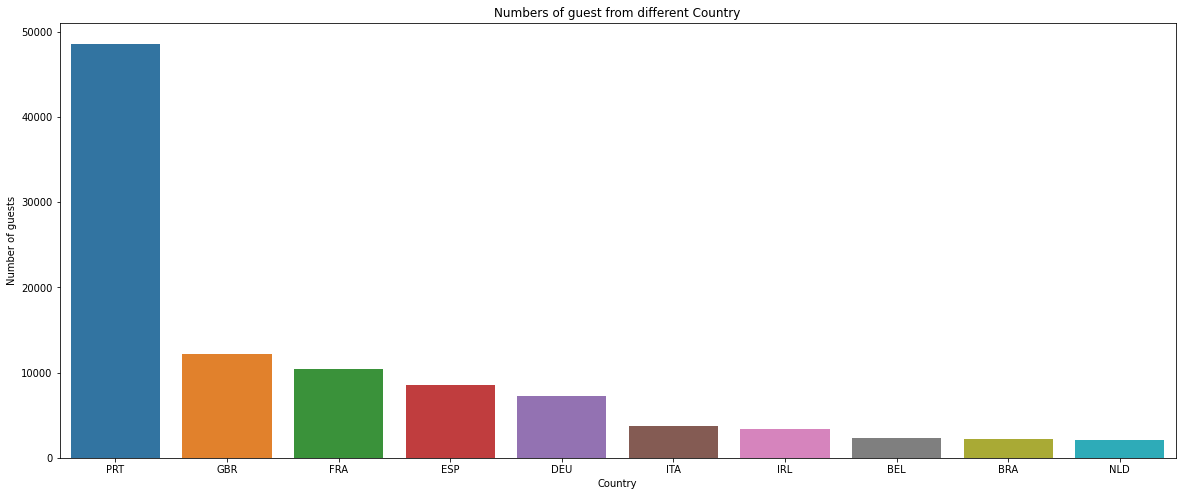

In [ ]:
country_df = df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

plt.figure(figsize=(20, 8))
sns.barplot(x=country_df['country'], y=country_df['count of guests'])
plt.xlabel("Country")
plt.ylabel("Number of guests")
plt.title("Numbers of guest from different Country")

**Observation:**

Most of the guests are coming from portugal i.e more 49000 guests are from portugal

3. Which meal type is most preffered meal of customers?

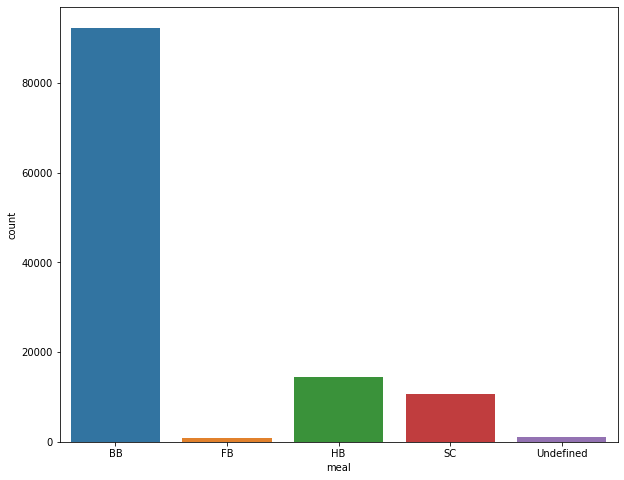

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df['meal'])
plt.show()

**Observation**

Most preferred meal type is BB (Bed and breakfast)

**Hotel wise Analysis**

4. What is percentage of bookings in each hotel?

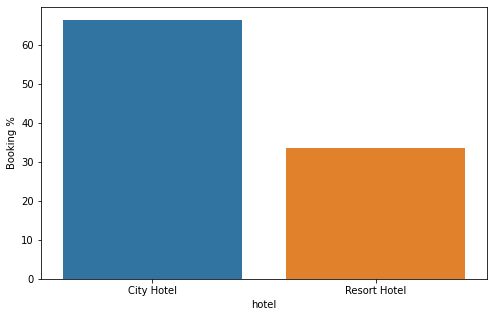

In [ ]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

**Observation**

Around 65% bookings are for City hotel and 35% bookings are for Resort hotel.

5. What is the percentage of repeated guests?

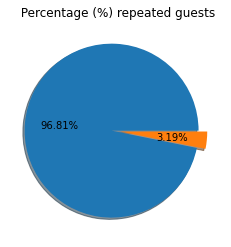

In [ ]:
plt.pie(df['is_repeated_guest'].value_counts(),
        explode=[0.05, 0.05],
        autopct='%1.2f%%',
        shadow=True)
plt.title(" Percentage (%) repeated guests")
plt.show()

**Observation**

Repeated guest are very few which only 3.19%. In order to retained the guests management should take feedbacks from guests and try to improve the services.

6. Which hotel has higher lead time?

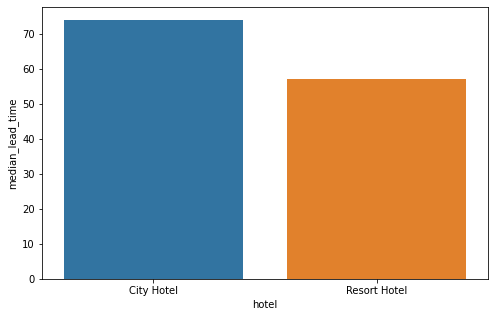

In [ ]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

**Observation**

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

**Distribution channel wise Analysis**

7. Which is the most common channel for booking hotels?

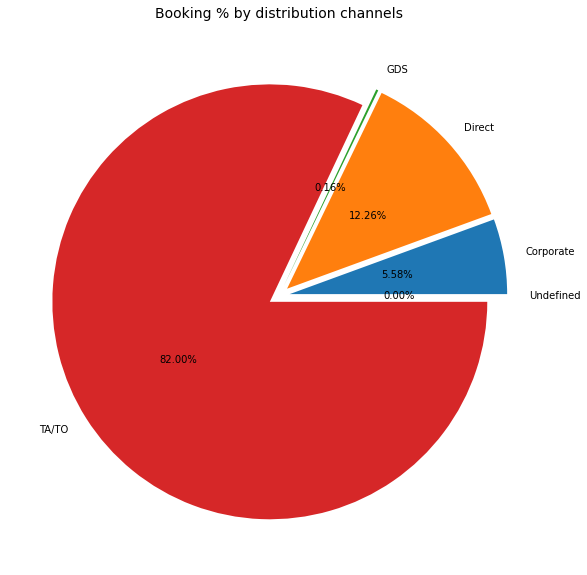

In [ ]:
group_by_dc = hotel_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (10,10))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

8. What is the percentage distribution of required_car_parking_space

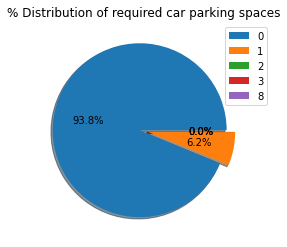

In [ ]:
plt.pie(df['required_car_parking_spaces'].value_counts(),
        explode=[0.05]*5,
        shadow=True,
        autopct='%1.1f%%',
        labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

**Booking cancellation Analysis**


9. What is the percentage of cancellation.

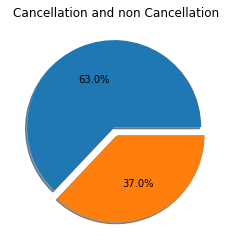

In [ ]:
plt.pie(df['is_canceled'].value_counts(),
        explode=[0.05, 0.05], 
        autopct='%1.1f%%', 
        shadow=True, 
        )
plt.title("Cancellation and non Cancellation")
plt.show()

**Observation:**

37.0 % of the bookings is cancelled

10. Which significant distribution channel has highest cancellation percentage?

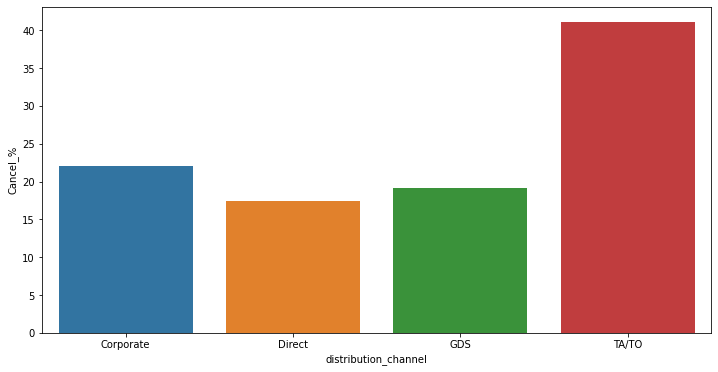

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (12,6))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

**Observation**

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 40% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers \ \ One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

**Average Monthly Adr**

In [ ]:
df= df.groupby ('arrival_date_month')['adr'].mean()
df

arrival_date_month
April        100.380790
August       140.111523
December      81.076776
February      73.582276
January       70.361241
July         126.788013
June         116.672192
March         80.679646
May          108.695516
November      73.794962
October       87.908879
September    105.049657
Name: adr, dtype: float64

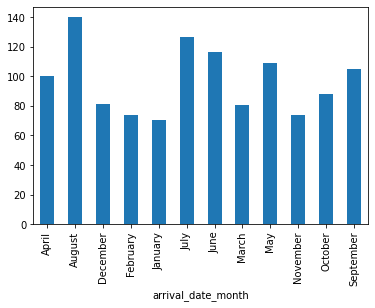

In [ ]:
df.plot (kind= 'bar');

**Observation:**

Months from April to September had mean monthly adr more than 100%

 **Relationship between ADR and total_stay**

Text(0.5, 1.0, 'Relationship between adr and total stay')

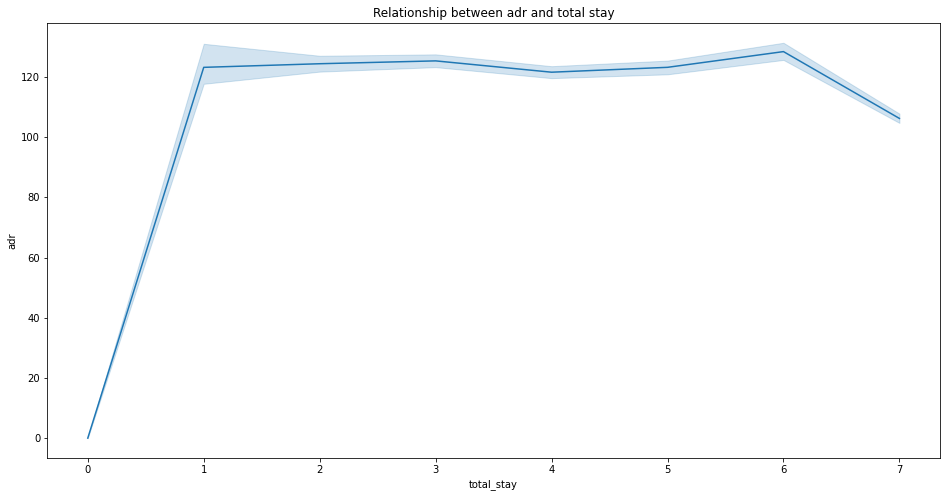

In [ ]:
adr_vs_stay = hotel_df.groupby(['total_stay', 'adr', 'hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay[:18000]

plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

**Observation**

As the total stay increases the adr also increases

**Correlation of columns**

Text(0.5, 1.0, 'Co-relation of columns')

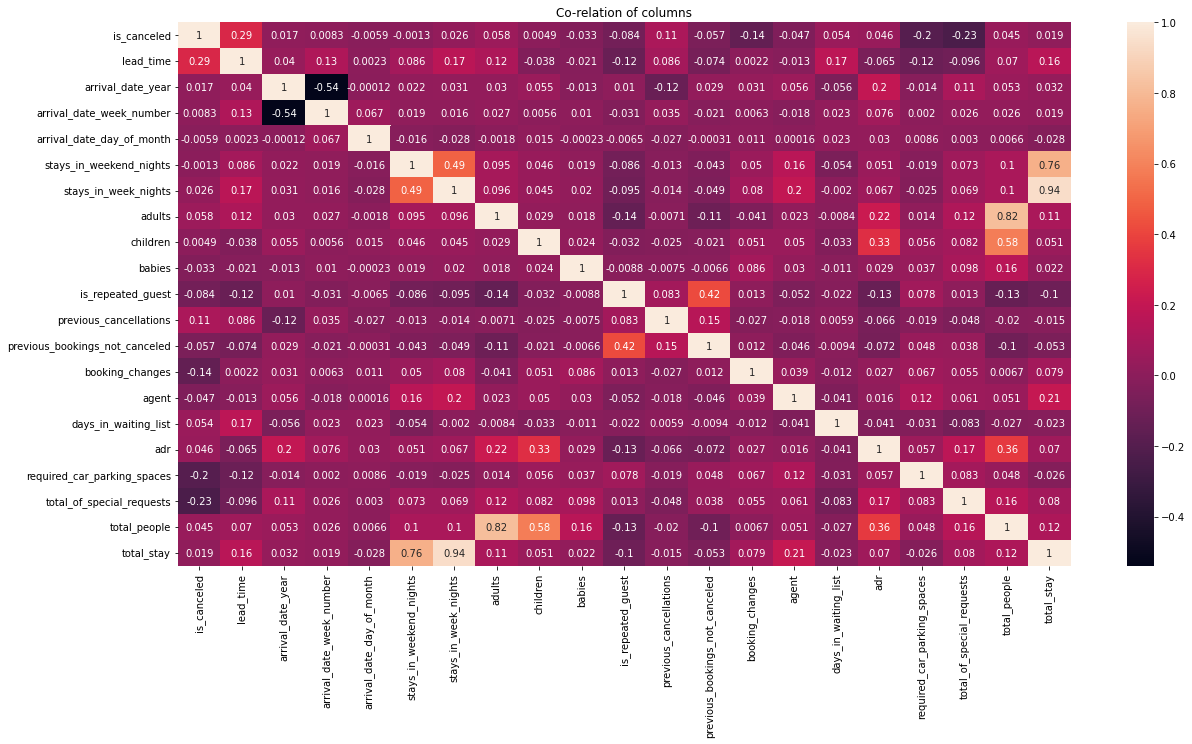

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(hotel_df.corr(), annot=True)
plt.title('Co-relation of columns')

**Observation**

Is_canceled and same room allotted or not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room.

lead_time and total stay is positively corelated.That means more is the stay of customer more will be the lead time.

adults, Childrens and babies are corelated to each other. That means more the people more will be adr.

is repeated guest and previous bookings not canceled has strong correlation may be repeated guests are not more likely to cancel their bookings.

**Conclusion**

City Hotel has twice the amount of reservations as compared to Resort Hotel 
over the same period of time.​

Among the top 10 countries with respect to number of bookings, most of them are European countries which belongs to the list  of which Portugal stands first with 49.0k bookings.​

After analyzing the meal data, it's found that most of the customers prefers BB(Bed & Breakfast).​

Around 65% bookings are City hotel and 35% bookings are for Resort hotel, therefore City hotel is busier the Resort hotel. Also the overall adr of city hotel is slightly higher than the Resort hotel.​

Repeated guest are very few which only 3.19%. In order to retained the guests management should take feedbacks from guests and try to improve the services.City Hotel has twice the amount of reservations as compared to Resort Hotel over the same period of time.​

Among the top 10 countries with respect to number of bookings, most of them are European countries which belongs to the list  of which Portugal stands first with 49.0k bookings.​

After analyzing the meal data, it's found that most of the customers prefers BB(Bed & Breakfast).​

Around 65% bookings are City hotel and 35% bookings are for Resort hotel, therefore City hotel is busier the Resort hotel. Also the overall adr of city hotel is slightly higher than the Resort hotel.​

Repeated guest are very few which only 3.19%. In order to retained the guests management should take feedbacks from guests and try to improve the services.
Guests use different channels for making bookings out of which most preferred way is TA/TO.​

Most of the hotels have car parking space.​

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 40% likely to get cancelled.​

Months from April to September had mean monthly adr more than 100%.​

As the total stay increases the adr also increases.
